In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
data=pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [13]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=1000)
mlp.fit(x_train,y_train)

MLPClassifier(max_iter=1000)

score:  0.9766081871345029
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



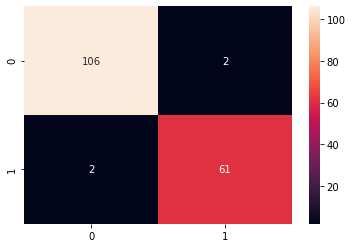

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print("score: ",mlp.score(x_test,y_test))
prediction = mlp.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 